In [107]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [108]:
df=pd.read_csv("/Users/namanmuktha/Desktop/mediksearch/Tel & Ap Data/TelanganaDBS.csv")

In [109]:
df.head()

,COLLEGE,RANK,LOC,CAT,SX,EWS,PHASE
0,"GOVT DENTAL COLLEGE AND HOSPITAL, HYDERABAD",66195.0,AU,OC,M,NO,P1
1,"GOVT DENTAL COLLEGE AND HOSPITAL, HYDERABAD",67988.0,AU,OC,F,NO,P1
2,"GOVT DENTAL COLLEGE AND HOSPITAL, HYDERABAD",68561.0,SVU,OC,F,NO,P1
3,"GOVT DENTAL COLLEGE AND HOSPITAL, HYDERABAD",68711.0,AU,OC,M,NO,P1
4,"GOVT DENTAL COLLEGE AND HOSPITAL, HYDERABAD",69482.0,AU,OC,F,NO,P1


In [110]:
df.dtypes

COLLEGE     object
RANK       float64
LOC         object
CAT         object
SX          object
EWS         object
PHASE       object
dtype: object

In [111]:
df["RANK"].describe()

count      4726.000000
mean     244724.712653
std       68245.875091
min       63730.000000
25%      202697.000000
50%      240376.500000
75%      288507.000000
max      790177.000000
Name: RANK, dtype: float64

array([[<Axes: title={'center': 'RANK'}>]], dtype=object)

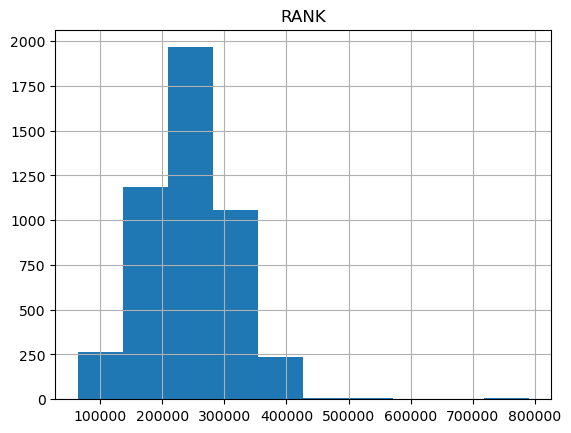

In [112]:
df.hist()

In [113]:
df.isna().sum()

COLLEGE     0
RANK        9
LOC         9
CAT         9
SX          9
EWS         0
PHASE      81
dtype: int64

In [114]:
df.shape

(4735, 7)

In [115]:
df=df.dropna()

In [116]:
df.isna().sum()

COLLEGE    0
RANK       0
LOC        0
CAT        0
SX         0
EWS        0
PHASE      0
dtype: int64

In [117]:
df.nunique()

COLLEGE      14
RANK       1556
LOC           4
CAT           8
SX            2
EWS           1
PHASE         5
dtype: int64

<Axes: xlabel='COLLEGE', ylabel='count'>

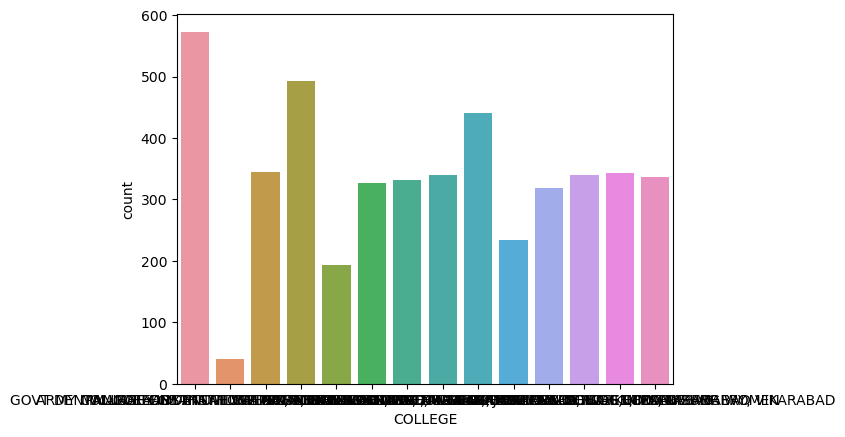

In [118]:
sns.countplot(data=df,x="COLLEGE")

In [119]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['COLLEGE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['COLLEGE'] = encoded_values

In [120]:
label_mapping

{'ARMY COLLEGE OF DENTAL SCIENCES, SECUNDERABAD': 0,
 'BALAJI DENTAL COLLEGE, MOINABAD': 1,
 'GOVT DENTAL COLLEGE AND HOSPITAL, HYDERABAD': 2,
 'KAMINENI INSTITUTE OF DENTAL SCIENCES, NARKETPALLY': 3,
 'M.N.R. DENTAL COLLEGE, FASALWADI': 4,
 'MALLA REDDY DENTAL COLLEGE FOR WOMEN': 5,
 'MALLA REDDY INSTITUTE OF DENTAL SCIENCES, HYD': 6,
 'MAMATA DENTAL COLLEGE, KHAMMAM': 7,
 'MAMATA INSTITUTE OF DENTAL SCIENCES, BACHUPALLY, HYDERABAD.': 8,
 'MEGHANA INSTITUTE OF DENTAL SCIENCES, NIZAMABAD': 9,
 'PANINEEYA MAHA VIDYALAYA INSTITUTE OF DENTAL SCIENCES': 10,
 'SRI SAI COLLEGE OF DENTAL SURGERY, VIKARABAD': 11,
 'SVS DENTAL COLLEGE, MAHABUBNAGAR': 12,
 'THIRUMALA ACADEMY OF DENTAL SCIENCES, NIZAMABAD': 13}

In [121]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['SX']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping1 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['SX'] = encoded_values

In [122]:
one_hot_encoded = pd.get_dummies(df['CAT'], prefix='CAT')

# Drop the original 'CAT' column from the DataFrame
df = df.drop('CAT', axis=1)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)


In [123]:

from sklearn.preprocessing import LabelEncoder
disorder_column = df['LOC']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_loc = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['LOC'] = encoded_values

In [124]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['PHASE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_phase = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['PHASE'] = encoded_values

In [125]:
df.head()

,COLLEGE,RANK,LOC,SX,EWS,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST
0,2,66195.0,0,1,NO,0,False,False,False,False,False,True,False,False
1,2,67988.0,0,0,NO,0,False,False,False,False,False,True,False,False
2,2,68561.0,3,0,NO,0,False,False,False,False,False,True,False,False
3,2,68711.0,0,1,NO,0,False,False,False,False,False,True,False,False
4,2,69482.0,0,0,NO,0,False,False,False,False,False,True,False,False


In [126]:
df=df.drop(["EWS"],axis=1)

In [127]:
df.head()

,COLLEGE,RANK,LOC,SX,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST
0,2,66195.0,0,1,0,False,False,False,False,False,True,False,False
1,2,67988.0,0,0,0,False,False,False,False,False,True,False,False
2,2,68561.0,3,0,0,False,False,False,False,False,True,False,False
3,2,68711.0,0,1,0,False,False,False,False,False,True,False,False
4,2,69482.0,0,0,0,False,False,False,False,False,True,False,False


In [128]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=75, encode='ordinal', strategy='uniform')

# Fit and transform the continuous column
df['discrete_column'] = discretizer.fit_transform(df[['RANK']])

# Print the DataFrame with the discretized column
print(df)

      COLLEGE      RANK  LOC  SX  PHASE  CAT_BCA  CAT_BCB  CAT_BCC  CAT_BCD  \
0           2   66195.0    0   1      0    False    False    False    False   
1           2   67988.0    0   0      0    False    False    False    False   
2           2   68561.0    3   0      0    False    False    False    False   
3           2   68711.0    0   1      0    False    False    False    False   
4           2   69482.0    0   0      0    False    False    False    False   
...       ...       ...  ...  ..    ...      ...      ...      ...      ...   
4729       11  337282.0    2   0      2    False    False    False    False   
4730       11  353636.0    2   0      1     True    False    False    False   
4731       11  355304.0    2   0      3    False    False    False    False   
4732       11  368401.0    2   0      2    False    False    False    False   
4734       11  451491.0    2   1      1    False    False    False    False   

      CAT_BCE  CAT_OC  CAT_SC  CAT_ST  discrete_col

/Users/namanmuktha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [129]:
df.head()

,COLLEGE,RANK,LOC,SX,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST,discrete_column
0,2,66195.0,0,1,0,False,False,False,False,False,True,False,False,0.0
1,2,67988.0,0,0,0,False,False,False,False,False,True,False,False,0.0
2,2,68561.0,3,0,0,False,False,False,False,False,True,False,False,0.0
3,2,68711.0,0,1,0,False,False,False,False,False,True,False,False,0.0
4,2,69482.0,0,0,0,False,False,False,False,False,True,False,False,0.0


<Axes: xlabel='COLLEGE', ylabel='count'>

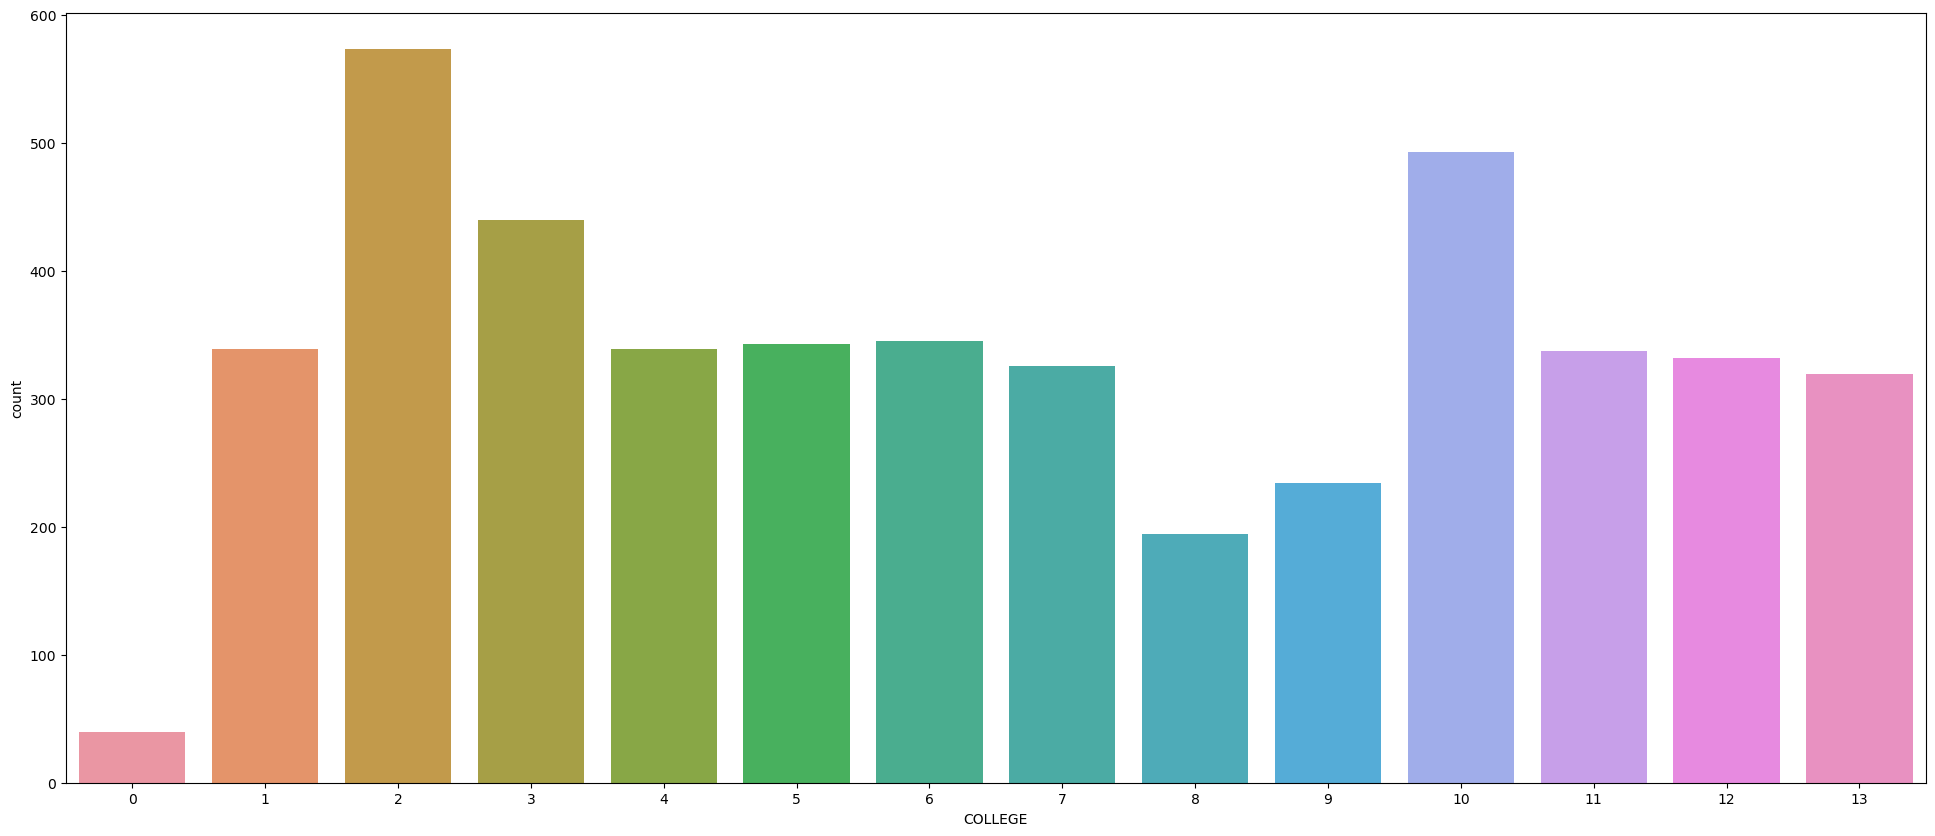

In [130]:
plt.figure(figsize=(24,10))
sns.countplot(data=df,x="COLLEGE")

In [131]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=420)

In [132]:
X=df.drop(['COLLEGE'],axis=1)
y=df['COLLEGE']

In [133]:
X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [134]:
df_updated=X_resampled

In [135]:
df_updated['COLLEGE']=y_resampled

<Axes: xlabel='COLLEGE', ylabel='count'>

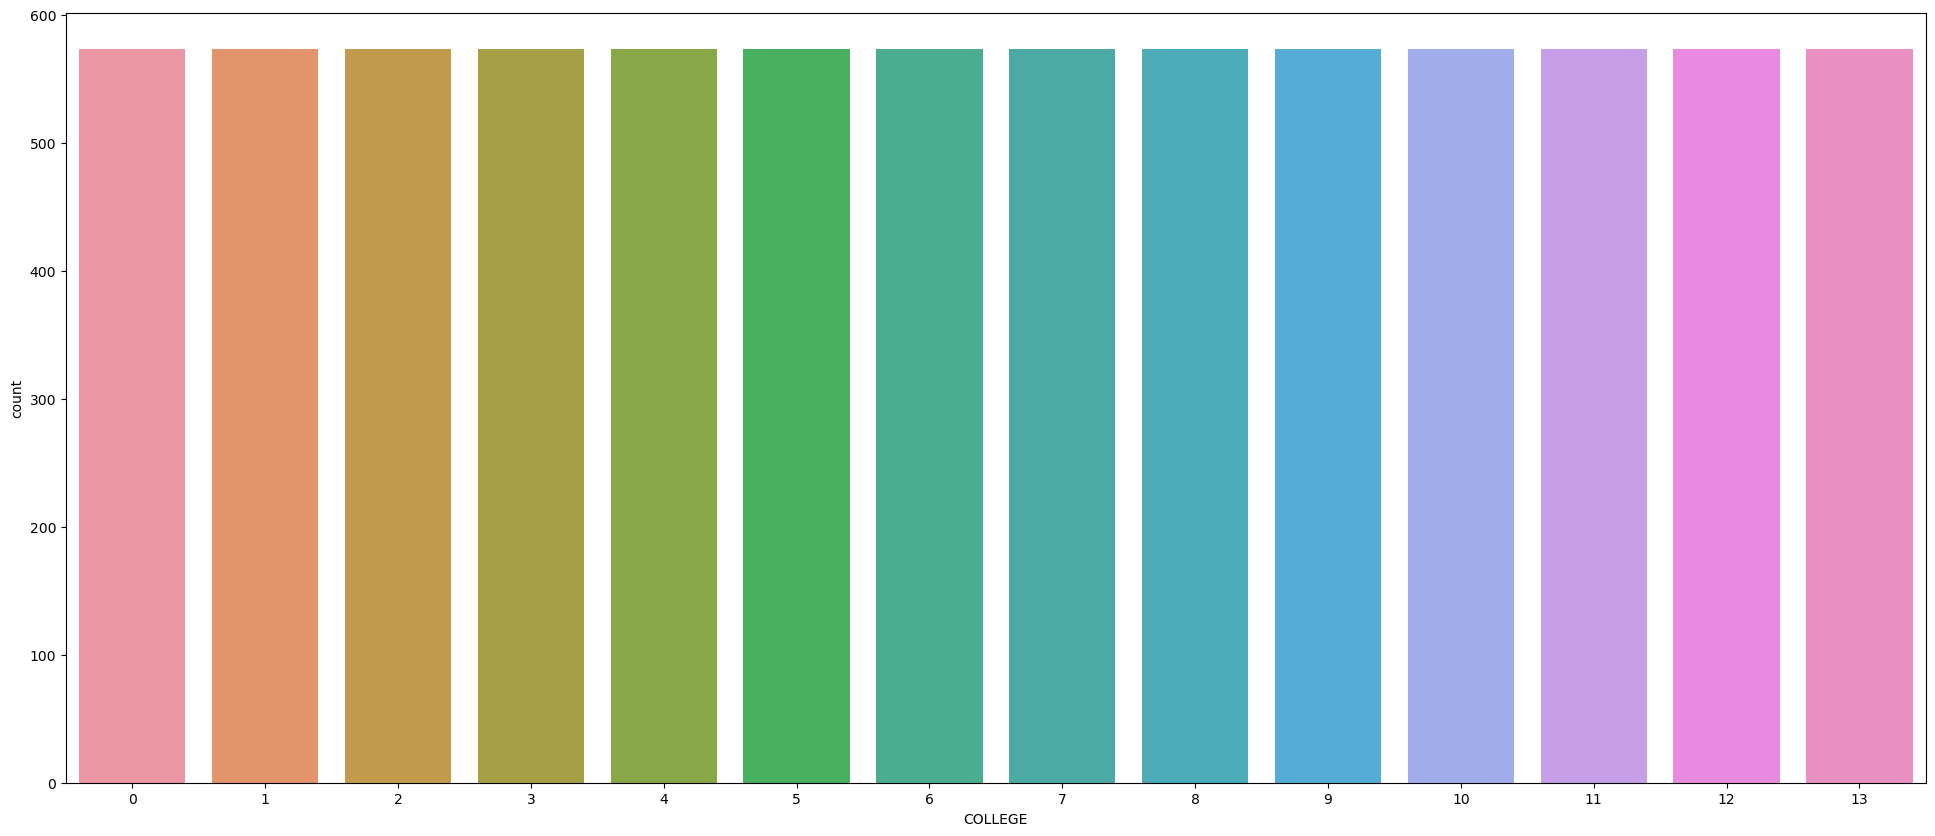

In [136]:
plt.figure(figsize=(24,10))
sns.countplot(data=df_updated,x="COLLEGE")

In [137]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(df_updated.drop(["COLLEGE"],axis=1),df_updated["COLLEGE"],test_size=0.2,random_state=231)

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_p=rfc.predict(X_test)
print(accuracy_score(y_p,y_test)*100)
print(confusion_matrix(y_p,y_test))
print(classification_report(y_p,y_test))

89.65732087227416
[[108   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0 117   0   0   0   1   1   0   1   0   0   0   0   0]
 [  0   0 106   0   1   0   5   2   0   0   4   0   1   0]
 [  0   2   0  81   2   1   3   0   0   1   1   0   2   0]
 [  0   0   0   1 114   2   0   2   0   0   0   1   1   1]
 [  0   3   0   0   1 100   0   0   0   0   1   1   1   0]
 [  0   1   1   0   0   2 116   1   1   0   2   0   1   0]
 [  0   1   2   1   0   0   0  84   0   0   0   0   4   2]
 [  0   0   0   2   0   0   0   2 110   0  32   0   0   0]
 [  0   2   0  14   1   0   0   0   0 117   0   1   1   1]
 [  0   1   4   4   0   0   5   0   5   0  74   1   1   0]
 [  0   2   0   1   2   1   3   0   0   0   1 101   1   1]
 [  0   1   0   2   0   0   0   2   3   0   1   0 100   0]
 [  0   3   0   0   0   0   0   0   0   2   0   0   0 111]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       109
           1       0.88      0.97      0.92   

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split=2)
dt.fit(X_train,y_train)
y_p=dt.predict(X_test)
print(accuracy_score(y_p,y_test))
print(classification_report(y_p,y_test))

0.8847352024922118
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       111
           1       0.87      0.97      0.92       120
           2       0.87      0.92      0.89       107
           3       0.76      0.83      0.79        98
           4       0.92      0.93      0.93       119
           5       0.93      0.88      0.90       114
           6       0.89      0.89      0.89       132
           7       0.90      0.84      0.87       100
           8       0.93      0.75      0.83       150
           9       0.94      0.85      0.89       133
          10       0.62      0.81      0.70        89
          11       0.96      0.93      0.94       109
          12       0.87      0.88      0.88       111
          13       0.93      0.96      0.95       112

    accuracy                           0.88      1605
   macro avg       0.89      0.89      0.88      1605
weighted avg       0.89      0.88      0.89      1605



In [143]:
y_p[:10]

array([ 6,  4,  9,  9,  2,  3,  6, 12, 10, 11])

In [144]:
y_test[:10]

123      6
5762     4
3142     9
1054     9
4066     2
895     12
2078     6
1586    12
4179    10
1918    11
Name: COLLEGE, dtype: int64